In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing Libraries
import pandas as pd       
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
%matplotlib inline

pd.options.display.max_colwidth = 100

import random
import os

from numpy.random import seed
seed(42)

random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob
from tensorflow.random import set_seed
set_seed(42)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#!pip install opencv-python-headless

In [ ]:
IMG_SIZE = 224
BATCH = 32
SEED = 42

In [ ]:
# Importing the dataset
main_path = "FOLDER PATH"


train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")

train_normal = glob.glob(train_path+"NORMAL_IMAGES*.JPG")   
train_abnormal = glob.glob(train_path+"ABNORMAL_IMAGES*.JPG") 

test_normal = glob.glob(test_path+"NORMAL_IMAGES*.JPG") 
test_abnormal = glob.glob(test_path+"ABNORMAL_IMAGES*.JPG") 

In [ ]:
# Forming the dataframe
train_list = [x for x in train_normal]
train_list.extend([x for x in train_abnormal])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Abnormal']*len(train_abnormal)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_abnormal])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Abnormal']*len(test_abnormal)]), columns = ['class'])
df_test['image'] = [x for x in test_list]


In [ ]:
df_train

,class,image
0,Normal,"/content/drive/MyDrive/LIDC nodes new/train/1,2/4.JPG"
1,Normal,"/content/drive/MyDrive/LIDC nodes new/train/1,2/9.2.JPG"
2,Normal,"/content/drive/MyDrive/LIDC nodes new/train/1,2/10.3.JPG"
3,Normal,"/content/drive/MyDrive/LIDC nodes new/train/1,2/11.4.JPG"
4,Normal,"/content/drive/MyDrive/LIDC nodes new/train/1,2/11.7.JPG"
...,...,...
785,Abnormal,"/content/drive/MyDrive/LIDC nodes new/train/4,5/1002.4.jpg"
786,Abnormal,"/content/drive/MyDrive/LIDC nodes new/train/4,5/982.3.jpg"
787,Abnormal,"/content/drive/MyDrive/LIDC nodes new/train/4,5/978.5.jpg"
788,Abnormal,"/content/drive/MyDrive/LIDC nodes new/train/4,5/1004.1.jpg"


In [ ]:
df_test

,class,image
0,Normal,"/content/drive/MyDrive/LIDC nodes new/test/1,2/4.JPG"
1,Normal,"/content/drive/MyDrive/LIDC nodes new/test/1,2/9.2.JPG"
2,Normal,"/content/drive/MyDrive/LIDC nodes new/test/1,2/10.3.JPG"
3,Normal,"/content/drive/MyDrive/LIDC nodes new/test/1,2/11.4.JPG"
4,Normal,"/content/drive/MyDrive/LIDC nodes new/test/1,2/11.7.JPG"
...,...,...
216,Abnormal,"/content/drive/MyDrive/LIDC nodes new/test/4,5/139.2.jpg"
217,Abnormal,"/content/drive/MyDrive/LIDC nodes new/test/4,5/139.3.jpg"
218,Abnormal,"/content/drive/MyDrive/LIDC nodes new/test/4,5/139.4.jpg"
219,Abnormal,"/content/drive/MyDrive/LIDC nodes new/test/4,5/142.4.jpg"


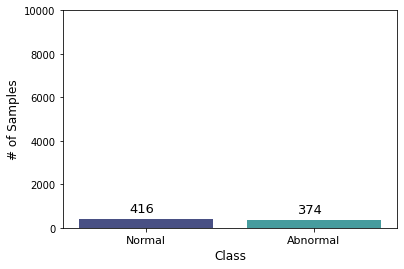

In [ ]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_train, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,10000)
plt.xticks([0,1], ['Normal', 'Abnormal'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)
    
plt.show()

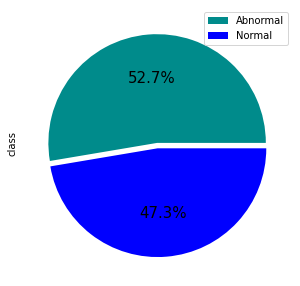

In [ ]:
plt.figure(figsize=(7,5))

df_train['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Abnormal', 'Normal'])
plt.show()

In [ ]:
import cv2

Train Set - Normal


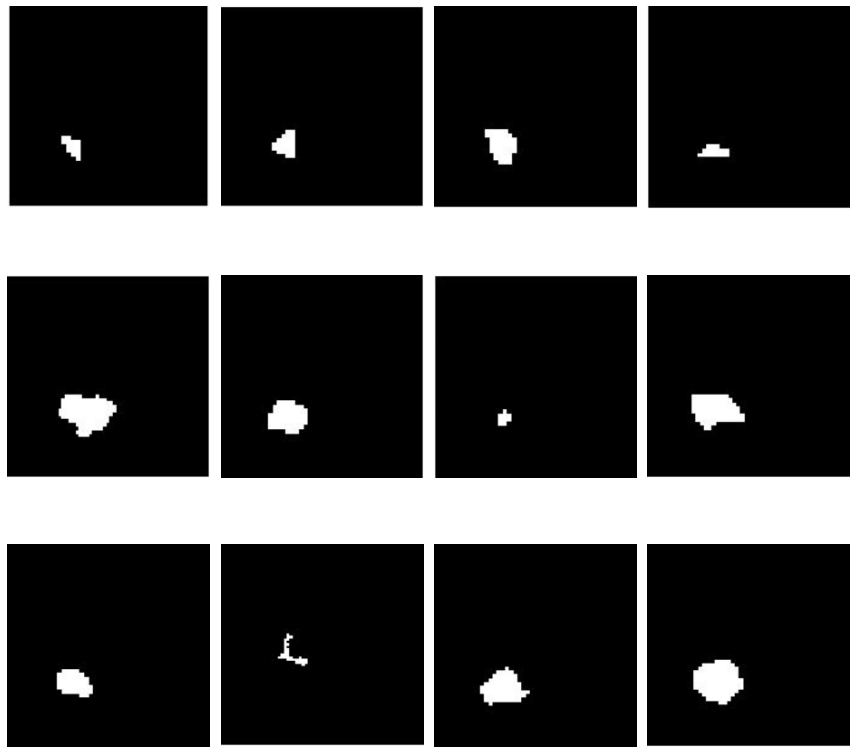

In [ ]:
print('Train Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Train Set - Abnormal


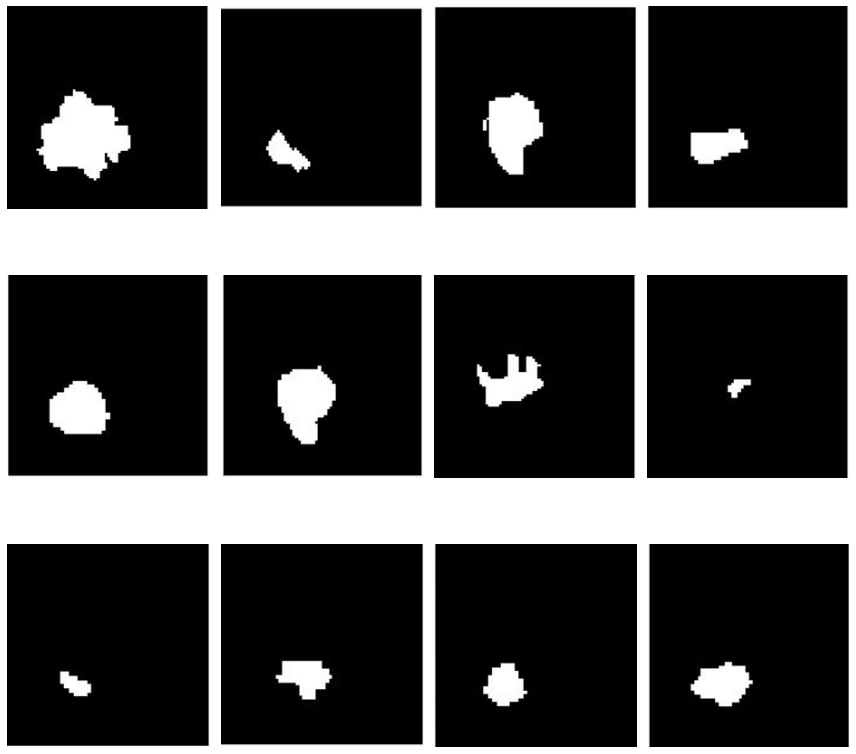

In [ ]:
print('Train Set - Abnormal')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_abnormal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Normal


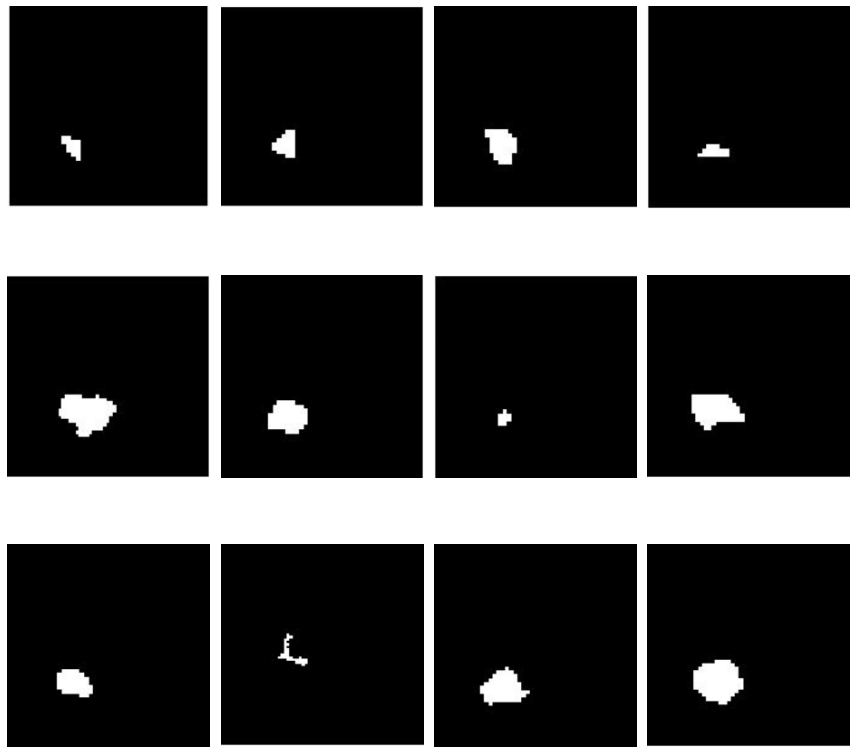

In [ ]:
print('Test Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Abnormal


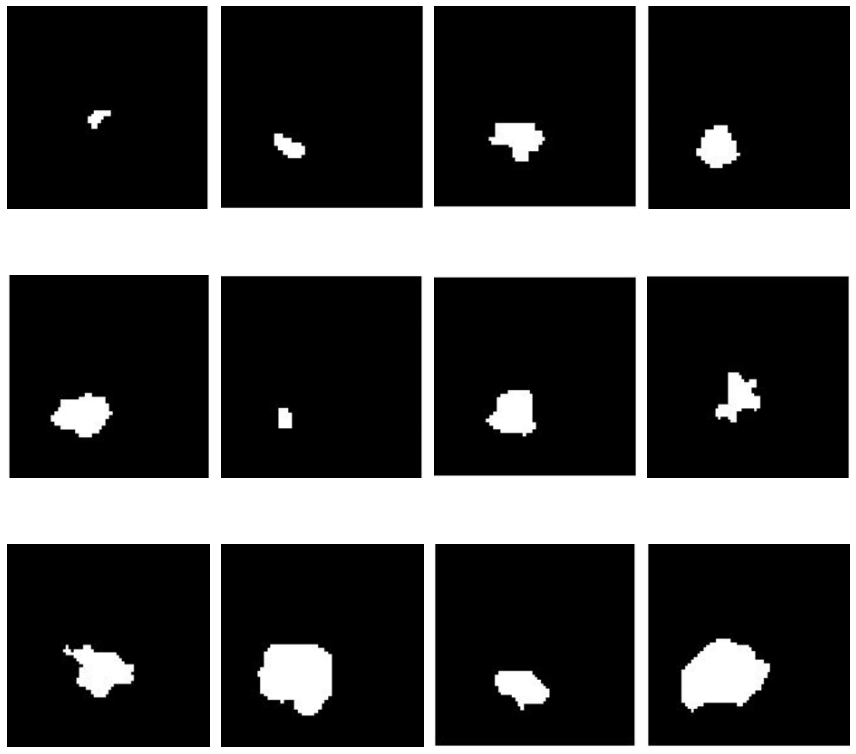

In [ ]:
print('Test Set - Abnormal')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_abnormal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

In [ ]:
train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = SEED, stratify = df_train['class'])

In [ ]:
train_df

,class,image
625,Abnormal,"/content/drive/MyDrive/LIDC nodes new/train/4,5/153.2.jpg"
442,Abnormal,"/content/drive/MyDrive/LIDC nodes new/train/4,5/31.1.JPG"
193,Normal,"/content/drive/MyDrive/LIDC nodes new/train/1,2/735.1.jpg"
423,Abnormal,"/content/drive/MyDrive/LIDC nodes new/train/4,5/7.2.JPG"
14,Normal,"/content/drive/MyDrive/LIDC nodes new/train/1,2/27.2.JPG"
...,...,...
427,Abnormal,"/content/drive/MyDrive/LIDC nodes new/train/4,5/11.10.JPG"
669,Abnormal,"/content/drive/MyDrive/LIDC nodes new/train/4,5/775.2.jpg"
475,Abnormal,"/content/drive/MyDrive/LIDC nodes new/train/4,5/55.4.JPG"
482,Abnormal,"/content/drive/MyDrive/LIDC nodes new/train/4,5/59.JPG"


In [ ]:
val_df

,class,image
507,Abnormal,"/content/drive/MyDrive/LIDC nodes new/train/4,5/76.2.JPG"
617,Abnormal,"/content/drive/MyDrive/LIDC nodes new/train/4,5/715.jpg"
729,Abnormal,"/content/drive/MyDrive/LIDC nodes new/train/4,5/857.2.jpg"
537,Abnormal,"/content/drive/MyDrive/LIDC nodes new/train/4,5/617.2.JPG"
468,Abnormal,"/content/drive/MyDrive/LIDC nodes new/train/4,5/51.2.JPG"
...,...,...
228,Normal,"/content/drive/MyDrive/LIDC nodes new/train/1,2/780.1.jpg"
474,Abnormal,"/content/drive/MyDrive/LIDC nodes new/train/4,5/55.3.JPG"
105,Normal,"/content/drive/MyDrive/LIDC nodes new/train/1,2/648.1.JPG"
141,Normal,"/content/drive/MyDrive/LIDC nodes new/train/1,2/118.6.jpg"


CNN MODEL

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1/255.)

ds_train = train_datagen.flow_from_dataframe(train_df,
                                             #directory=train_path, #dataframe contains the full paths
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'binary',
                                             batch_size = BATCH,
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(val_df,
                                            #directory=train_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = BATCH,
                                            seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                            #directory=test_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = 1,
                                            shuffle = False)

Found 632 validated image filenames belonging to 2 classes.
Found 158 validated image filenames belonging to 2 classes.
Found 221 validated image filenames belonging to 2 classes.


In [ ]:
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,                                     
    patience = 2,                                   
    min_delt = 1e-7,                                
    cooldown = 0,                               
    verbose = 1
) 

In [ ]:
def get_model():
    
    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    # Block One
    x = layers.Conv2D(filters=16, kernel_size=3, padding='valid')(inputs)
    #x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)

    # Block Three
    x = layers.Conv2D(filters=32, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    
    # Block Five
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    #x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Head
    #x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

In [ ]:
keras.backend.clear_session()

model = get_model()
model.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=0.0001), metrics='binary_accuracy')

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 activation (Activation)     (None, 222, 222, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 batch_normalization (BatchN  (None, 109, 109, 32)     128       
 ormalization)                                               

In [ ]:
history = model.fit(ds_train,
          batch_size = BATCH, epochs = 30,
          validation_data=ds_val,
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/30
19/19 [==============================] - 237s 12s/step - loss: 0.7278 - binary_accuracy: 0.5918 - val_loss: 0.6832 - val_binary_accuracy: 0.4810
Epoch 2/30
19/19 [==============================] - 10s 502ms/step - loss: 0.6290 - binary_accuracy: 0.6835 - val_loss: 0.6843 - val_binary_accuracy: 0.4937
Epoch 3/30
19/19 [==============================] - 10s 501ms/step - loss: 0.6263 - binary_accuracy: 0.6820 - val_loss: 0.6743 - val_binary_accuracy: 0.5000
Epoch 4/30
19/19 [==============================] - 10s 507ms/step - loss: 0.6261 - binary_accuracy: 0.6329 - val_loss: 0.6749 - val_binary_accuracy: 0.7342
Epoch 5/30
19/19 [==============================] - 10s 511ms/step - loss: 0.6056 - binary_accuracy: 0.6741 - val_loss: 0.6715 - val_binary_accuracy: 0.6582
Epoch 6/30
19/19 [==============================] - 10s 515ms/step - loss: 0.6092 - binary_accuracy: 0.6883 - val_loss: 0.6662 - val_binary_accuracy: 0.7278
Epoch 7/30
19/19 [==============================] - 10s 506

In [ ]:
score = model.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.594022810459137
Val accuracy: 0.6962025165557861


In [ ]:
score = model.evaluate(ds_test, steps = len(df_test), verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5634387135505676
Test accuracy: 0.7420814633369446


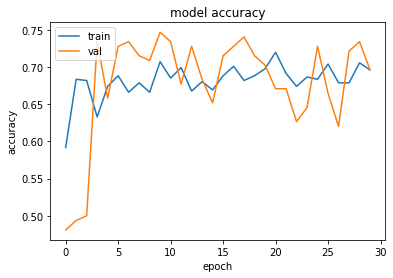

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

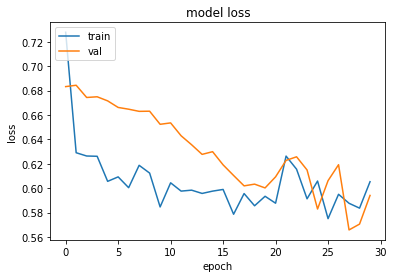

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#model.save('/workspace/CNN.h5')

TRANSFER LEARNING

In [ ]:
# Applying ResNet50
base_model = tf.keras.applications.ResNet50(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model.trainable = False

def get_pretrained():
    
    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    x = base_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
keras.backend.clear_session()

model_pretrained = get_pretrained()
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=5e-5), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [ ]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/50
19/19 [==============================] - 17s 693ms/step - loss: 0.7055 - binary_accuracy: 0.4604 - val_loss: 0.6877 - val_binary_accuracy: 0.5253
Epoch 2/50
19/19 [==============================] - 11s 575ms/step - loss: 0.6974 - binary_accuracy: 0.5158 - val_loss: 0.6796 - val_binary_accuracy: 0.5759
Epoch 3/50
19/19 [==============================] - 11s 569ms/step - loss: 0.6808 - binary_accuracy: 0.6044 - val_loss: 0.6736 - val_binary_accuracy: 0.6392
Epoch 4/50
19/19 [==============================] - 12s 602ms/step - loss: 0.6796 - binary_accuracy: 0.5522 - val_loss: 0.6698 - val_binary_accuracy: 0.6392
Epoch 5/50
19/19 [==============================] - 12s 592ms/step - loss: 0.6775 - binary_accuracy: 0.5870 - val_loss: 0.6664 - val_binary_accuracy: 0.6772
Epoch 6/50
19/19 [==============================] - 12s 592ms/step - loss: 0.6681 - binary_accuracy: 0.5965 - val_loss: 0.6620 - val_binary_accuracy: 0.6329
Epoch 7/50
19/19 [==============================] - 11s 57

In [ ]:
score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.5909779667854309
Val accuracy: 0.7151898741722107


In [ ]:
score = model_pretrained.evaluate(ds_test, steps = len(df_test)/BATCH, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5528906583786011
Test accuracy: 0.8571428656578064


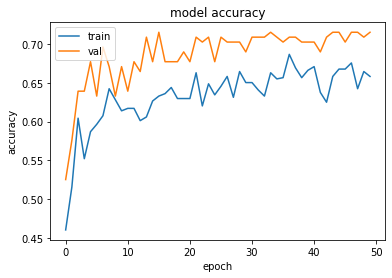

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

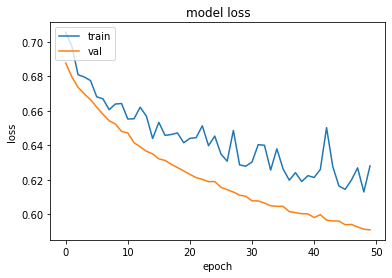

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#model_pretrained.save('/workspace/ResNet50.h5')

In [ ]:
# Applying VGG16
base_model = tf.keras.applications.VGG16(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model.trainable = False

def get_pretrained():
    
    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    x = base_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
keras.backend.clear_session()

model_pretrained = get_pretrained()
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=5e-5), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [ ]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/50
19/19 [==============================] - 23s 1s/step - loss: 0.6962 - binary_accuracy: 0.5411 - val_loss: 0.6880 - val_binary_accuracy: 0.5253
Epoch 2/50
19/19 [==============================] - 15s 741ms/step - loss: 0.6921 - binary_accuracy: 0.5063 - val_loss: 0.6844 - val_binary_accuracy: 0.5823
Epoch 3/50
19/19 [==============================] - 15s 741ms/step - loss: 0.6917 - binary_accuracy: 0.5190 - val_loss: 0.6813 - val_binary_accuracy: 0.6076
Epoch 4/50
19/19 [==============================] - 16s 805ms/step - loss: 0.6885 - binary_accuracy: 0.5475 - val_loss: 0.6784 - val_binary_accuracy: 0.6076
Epoch 5/50
19/19 [==============================] - 15s 742ms/step - loss: 0.6805 - binary_accuracy: 0.5791 - val_loss: 0.6757 - val_binary_accuracy: 0.6013
Epoch 6/50
19/19 [==============================] - 15s 739ms/step - loss: 0.6817 - binary_accuracy: 0.5870 - val_loss: 0.6728 - val_binary_accuracy: 0.6392
Epoch 7/50
19/19 [==============================] - 15s 748ms

In [ ]:
score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.604620635509491
Val accuracy: 0.6835442781448364


In [ ]:
score = model_pretrained.evaluate(ds_test, steps = len(df_test)/BATCH, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5395398736000061
Test accuracy: 0.8571428656578064


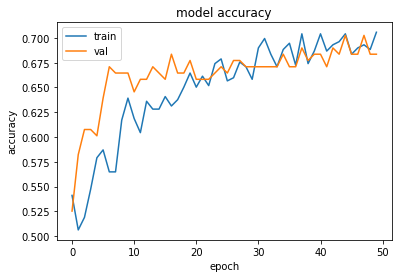

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

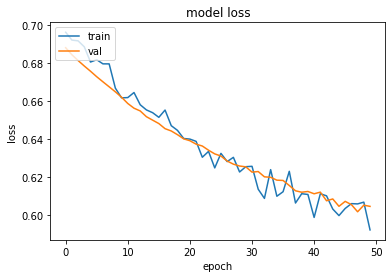

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#model_pretrained.save('/workspace/vgg16.h5')

FINE TUNING

In [ ]:
model_pretrained.trainable = True

# Freeze all layers except for the
for layer in model_pretrained.layers[:-13]:
    layer.trainable = False

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(model_pretrained.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_1 True
1 vgg16 True
2 global_average_pooling2d True
3 dense True
4 dropout True
5 dense_1 True


In [ ]:
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=0.0001), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [ ]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/50
19/19 [==============================] - 30s 1s/step - loss: 0.7158 - binary_accuracy: 0.6282 - val_loss: 0.5843 - val_binary_accuracy: 0.6899
Epoch 2/50
19/19 [==============================] - 24s 1s/step - loss: 0.5808 - binary_accuracy: 0.7231 - val_loss: 0.5225 - val_binary_accuracy: 0.7595
Epoch 3/50
19/19 [==============================] - 24s 1s/step - loss: 0.5663 - binary_accuracy: 0.7104 - val_loss: 0.5230 - val_binary_accuracy: 0.7532
Epoch 4/50
19/19 [==============================] - 25s 1s/step - loss: 0.5426 - binary_accuracy: 0.7294 - val_loss: 0.5062 - val_binary_accuracy: 0.7595
Epoch 5/50
19/19 [==============================] - 24s 1s/step - loss: 0.5453 - binary_accuracy: 0.7326 - val_loss: 0.6338 - val_binary_accuracy: 0.6709
Epoch 6/50
19/19 [==============================] - 24s 1s/step - loss: 0.5614 - binary_accuracy: 0.7294 - val_loss: 0.5567 - val_binary_accuracy: 0.7342
Epoch 7/50
19/19 [==============================] - 24s 1s/step - loss: 0.56

In [ ]:
score =  model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.5796148777008057
Val accuracy: 0.7278481125831604


In [ ]:
score =  model_pretrained.evaluate(ds_test, steps = len(df_test), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3917234539985657
Test accuracy: 0.8416289687156677


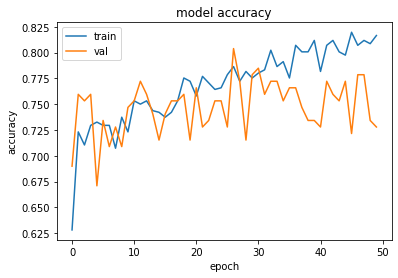

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

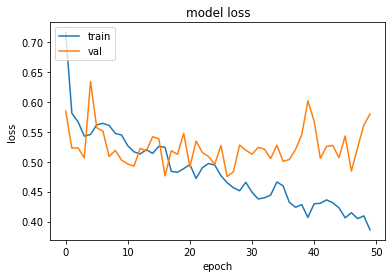

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#model_pretrained.save('/workspace/vgg16-finetune.h5')

PERFORMANCE MATRICES

In [ ]:
num_label = {'Normal': 0, 'Abnormal' : 1}
Y_test = df_test['class'].copy().map(num_label).astype('int')

In [ ]:
ds_test.reset()
predictions = model_pretrained.predict(ds_test, steps=len(ds_test), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)

In [ ]:
print("Test Accuracy: ", accuracy_score(Y_test, pred_labels))

Test Accuracy:  0.1583710407239819


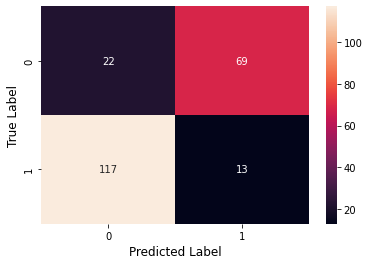

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [ ]:
print(metrics.classification_report(Y_test, pred_labels, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.16      0.24      0.19        91
           1       0.16      0.10      0.12       130

    accuracy                           0.16       221
   macro avg       0.16      0.17      0.16       221
weighted avg       0.16      0.16      0.15       221



ROC_AUC:  0.08427726120033813


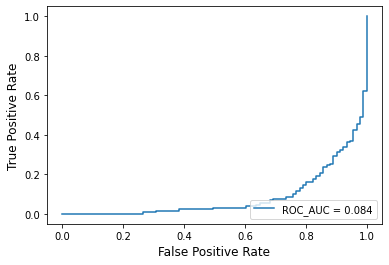

In [ ]:
roc_auc = metrics.roc_auc_score(Y_test, predictions)
print('ROC_AUC: ', roc_auc)

fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)

plt.plot(fpr, tpr, label = 'ROC_AUC = %0.3f' % roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()